In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
#warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

# Random Selection

In [2]:
# Can make random choices from an array
coin = make_array('heads', 'tails')
np.random.choice(coin)

'tails'

In [3]:
d6 = np.arange(1, 7)
np.random.choice(d6)

1

## Comparison ##

In [4]:
3 > 1

True

In [5]:
3 < 1

False

In [6]:
# Single equals (assignment equals) is for assigning to a variable.
# Double equals (comparison equals) is for asking whether two quantities are equal.
3 = 3

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (2580492036.py, line 3)

In [7]:
3 == 3

True

In [8]:
one = 1
two = 2

In [9]:
# equal
one == 1

True

In [10]:
# less or equal
one <= one

True

In [11]:
# the "and" of two statements is true only when both are
one == one and two > one

True

In [12]:
one == one and one > two

False

In [13]:
# the "or" of two statements is true if at least one of them is true
one < two or two < one

True

In [14]:
# the "not" of a statement is the opposite truth value of the statement on its own
not(one > two)

True

## Conditional Statements

In [15]:
age = 20

In [16]:
if age >= 18:
    print('You can legally vote.')

You can legally vote.


In [17]:
if age >= 21:
    print('You can legally drink.')

In [18]:
def age(x):
    if x >= 18:
        return 'You can legally vote.'
    if x >= 21:
        return 'You can legally drink.'

In [19]:
age(3)

In [20]:
age(20)

'You can legally vote.'

In [21]:
# A function terminates as soon as it hits its first return value.
age(25)

'You can legally vote.'

In [22]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18:
        return 'You can legally vote.'
    else:
        return 'You can legally drink milk.'

In [23]:
age(3)

'You can legally drink milk.'

In [24]:
age(20)

'You can legally vote.'

In [25]:
age(23)

'You can legally vote and drink.'

# Practice

Write a function called "simulate_one_round". It takes no inputs. \
Simulate a d6 roll for yourself and another for your opponent. \
If your roll is larger, return 1.
If your roll is smaller, return -1.
Otherwise, return 0.

In [26]:
def simulate_one_round():
    user_roll = np.random.choice(d6)
    computer_roll = np.random.choice(d6)

    if user_roll > computer_roll:
        return 1
    elif user_roll < computer_roll:
        return -1
    return 0

simulate_one_round()

-1

# Iteration

In [27]:
# A for loop sends a variable through an array taking on each value one at a time.
# The code in the loop is executed one time per value.
pets = make_array('cat', 'dog', 'rabbit')

for pet in pets:
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [28]:
# It's common to use the array just to count the number of times you've executed.
# Notice the variable i is not used anywhere.
for i in np.arange(5):
    print('hello')

hello
hello
hello
hello
hello


In [29]:
# You can do summation with a for loop.
sum = 0 # initialize the variable or Python will complain
for i in np.arange(1,5):
    sum = sum + i
    print(sum)

1
3
6
10


# Practice

Write a function called one_hundred_simulations. It takes no inputs.\
Use a for loop to call the function simulate_one_round one hundred times. \
Sum up your total winnings by adding all the outputs togther.


In [30]:
def one_hundred_simulations():
    total = 0
    for i in range(100):
        total += simulate_one_round()
    return total
one_hundred_simulations()

3

# Appending Arrays

What if we wanted to keep a list of all the outcomes of the simulation, not just the sum?

In [31]:
nums = make_array()
for i in np.arange(1, 5):
    nums = np.append(nums, i)

nums

array([ 1.,  2.,  3.,  4.])

# Practice

Modify one_hundred_simulations so that it returns an array containing all one hundred outcomes.

In [32]:
def one_hundred_simulations():
    total = make_array()
    for i in range(1,101):
        total = np.append(total, simulate_one_round())
    return total
one_hundred_simulations()

array([ 1., -1., -1., -1.,  1., -1.,  0.,  1.,  1., -1., -1.,  1.,  1.,
        0., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  0.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  0.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  0., -1.,  1.,  1.,  1., -1.,  0., -1., -1.,
       -1.,  0.,  0., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  0., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  0.,
       -1.,  1.,  1., -1.,  0.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        0., -1., -1.,  0.,  1., -1.,  0., -1.,  1.])

In [33]:
outcomes = one_hundred_simulations()
results_table = Table().with_column('My winnings', outcomes)
results_table.show(10)

My winnings
1
-1
0
-1
-1
1
-1
1
1
-1


In [34]:
results_table_grouped = results_table.group('My winnings')
results_table_grouped.show()

My winnings,count
-1,47
0,14
1,39


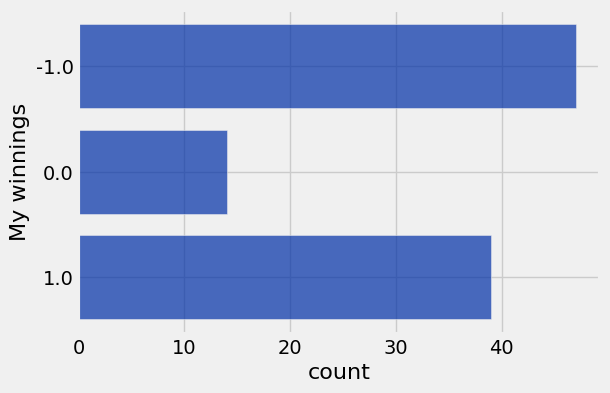

In [35]:
results_table_grouped.barh('My winnings')